In [73]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

from keras import backend as K
K.set_image_dim_ordering('tf')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [6]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=10

# Define the number of classes
num_classes = 7

In [11]:
data_path = os.getcwd() + '/data_img'
img_data_list = []
for fol in os.listdir(data_path):
    img_list = os.listdir(data_path + '/'+fol)
    print(' Loading: Folder > '+fol)
    for img in img_list:
        input_img = cv2.imread(data_path + '/'+fol+'/'+img)
        print(img)
        input_img = cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
        input_img = cv2.resize(input_img,(img_rows,img_cols))
        img_data_list.append(input_img)
type(input_img)        

 Loading: Folder > 104
1600.jpg
1601.jpg
1602.jpg
1603.jpg
1605.jpg
 Loading: Folder > 120
6431.jpg
6433.jpg
6434.jpg
6437.jpg
6438.jpg
 Loading: Folder > 15
4693.jpg
4696.jpg
4699.jpg
4700.jpg
4701.jpg
 Loading: Folder > 5
1.jpg
3.jpg
4.jpg
6.jpg
7.jpg
 Loading: Folder > 67
3624.jpg
3625.jpg
3626.jpg
3628.jpg
3629.jpg
 Loading: Folder > 86
5764.jpg
5765.jpg
5766.jpg
5767.jpg
5768.jpg
 Loading: Folder > 9
8479.jpg
8480.jpg
8481.jpg
8482.jpg
8483.jpg


numpy.ndarray

In [12]:
type(img_data_list)

list

In [13]:
img_data = np.array(img_data_list)
img_data.shape

(35, 128, 128)

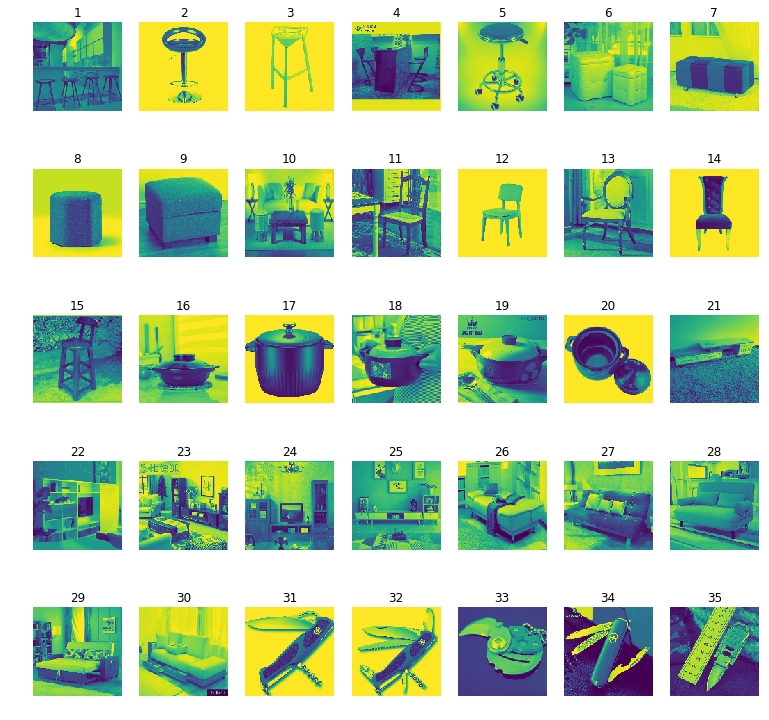

In [38]:
fig = plt.figure(figsize=(13,13))
for i in range(0,5):
    for j in range(0,7):
        idx = i*7 + j +1
        ax = fig.add_subplot(5,7,idx)
        ax.tick_params(bottom="off",top="off",left="off",right="off")
        ax.get_xaxis().set_visible = False
        ax.get_yaxis().set_visible = False
        ax.axis('off')
        ax.set_title(idx)
        ax.imshow(img_data[idx-1])

In [63]:
img_data= np.expand_dims(img_data, axis=4) 

C:\Users\40204984\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Both axis > a.ndim and axis < -a.ndim - 1 are deprecated and will raise an AxisError in the future.
  """Entry point for launching an IPython kernel.


In [40]:
y_label = ['s_chair','c_chair','n_chair','cooker','TV_stand','sofa','knife']

In [64]:
img_data = img_data/255

In [57]:
y=np.zeros((35,),dtype='int')
y[0:6]=0
y[6:10]=1
y[10:16]=2
y[16:21]=3
y[21:26]=4
y[26:31]=5
y[31:35]=6

In [58]:
Y_cat = np_utils.to_categorical(y,7)

In [59]:
Y_cat

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
 

In [65]:
x, y = shuffle(img_data, Y_cat)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)


In [75]:
input_shape=img_data[0].shape
print(input_shape)
model = Sequential()

model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
#model.add(Convolution2D(64, 3, 3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=["accuracy"])


(128, 128, 1)


C:\Users\40204984\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  """
C:\Users\40204984\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
C:\Users\40204984\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  if sys.path[0] == '':


In [76]:
hist = model.fit(X_train, y_train, batch_size=16, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

C:\Users\40204984\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 31 samples, validate on 4 samples
Epoch 1/10
31/31 [==============================] - 6s 178ms/step - loss: 1.9748 - acc: 0.1935 - val_loss: 1.9466 - val_acc: 0.0000e+00
Epoch 2/10
31/31 [==============================] - 4s 118ms/step - loss: 1.9501 - acc: 0.1290 - val_loss: 1.9489 - val_acc: 0.0000e+00
Epoch 3/10
31/31 [==============================] - 4s 117ms/step - loss: 1.9459 - acc: 0.1290 - val_loss: 1.9487 - val_acc: 0.0000e+00
Epoch 4/10
31/31 [==============================] - 4s 118ms/step - loss: 1.9443 - acc: 0.2258 - val_loss: 1.9490 - val_acc: 0.2500
Epoch 5/10
31/31 [==============================] - 4s 118ms/step - loss: 1.9461 - acc: 0.1613 - val_loss: 1.9475 - val_acc: 0.2500
Epoch 6/10
31/31 [==============================] - 4s 122ms/step - loss: 1.9454 - acc: 0.0645 - val_loss: 1.9476 - val_acc: 0.2500
Epoch 7/10
31/31 [==============================] - 4s 119ms/step - loss: 1.9421 - acc: 0.2581 - val_loss: 1.9460 - val_acc: 0.2500
Epoch 8/10
31/31 [===

In [78]:
model.predict(X_test)

array([[0.15359358, 0.11877872, 0.14721927, 0.15422392, 0.13571955,
        0.15515172, 0.13531332],
       [0.15358979, 0.11879036, 0.1472187 , 0.15421861, 0.13572274,
        0.15514447, 0.13531534],
       [0.15359989, 0.11876035, 0.14721994, 0.15423504, 0.13571379,
        0.1551623 , 0.13530876],
       [0.15359598, 0.11877415, 0.14721994, 0.15422791, 0.13571692,
        0.15515439, 0.13531077]], dtype=float32)

In [80]:
X_test[0][:,:,0].shape

(128, 128)

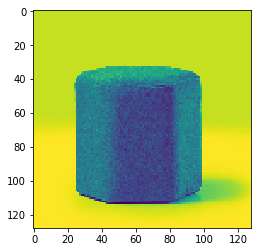

In [84]:
plt.imshow(X_test[1][:,:,0])